##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

Plik SCORES.csv

In [1]:
# Zaimportowanie niezbędnych bibliotek
from patsy import dmatrices
from sklearn import linear_model, metrics, model_selection
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Odczytanie danych z pliku SCORES.csv
df = pd.read_csv('SCORES.csv')
df.head(5)
#df.describe()
#df.shape

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

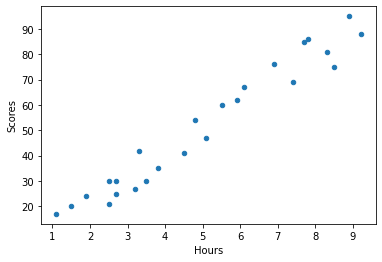

In [3]:
# Wstępny wykres uzyskanych danych
df.plot.scatter('Hours', 'Scores')

In [4]:
# Podział na zbiory danych
# X - dane niezależne (hours)
# y - dane zależne (scores)
y, X = dmatrices("Scores ~ Hours-1", df)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Utworzenie modelu regresji liniowej
reg = linear_model.LinearRegression().fit(X_train, y_train)
print("Wskaźnik coef:")
print(reg.coef_)
print("\nWskaźnik intercept:")
print(reg.intercept_)

Wskaźnik coef:
[[9.71054094]]

Wskaźnik intercept:
[2.79419668]


Wskaźnik intercept jest to współczynnik Beta0 występujący we wzorze na strukturę modelu. Jest to punkt przecięcia się z osią 𝑦 gdy wszystkie predyktory są równe 0.

Wskaźnik coef to z kolei współczynnik Beta1 także występujący w wyżej wspomnianym wzorze.

In [6]:
# Dokonanie predykcji części testowej X
y_pred = reg.predict(X_test)
print("Dane predykcyjne:")
print(y_pred)
print("\nPosiadane dane:")
print(y_test)

Dane predykcyjne:
[[83.39168645]
 [27.07054902]
 [27.07054902]
 [69.79692914]
 [60.0863882 ]
 [29.0126572 ]
 [34.83898177]
 [52.31795545]]

Posiadane dane:
[[81.]
 [30.]
 [21.]
 [76.]
 [62.]
 [25.]
 [42.]
 [47.]]


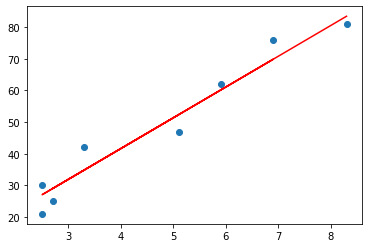

In [7]:
# Wykres konfrontujący dane testowe z predykcjami
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.show()

In [8]:
# Walidacja uzyskanych predykcji
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = metrics.mean_squared_error(y_test, y_pred, squared=False)

print("Średni błąd bezwględny: " + str(MAE))
print("\nBłąd średniokwadratowy: " + str(MSE))
print("\nPierwiastek błedu średniokwadratowego: " + str(RMSE))

Średni błąd bezwględny: 4.499999999999998

Błąd średniokwadratowy: 23.61945761415174

Pierwiastek błedu średniokwadratowego: 4.859985351228103


Plik SBP.csv

   Age  SBP
0   60  117
1   61  120
2   74  145
3   57  129
4   63  132


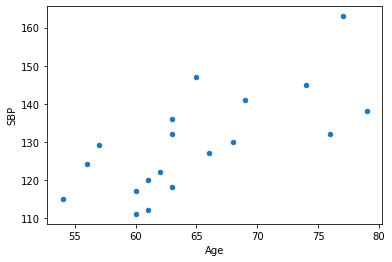

Wskaźnik coef:
[[1.44882707]]

Wskaźnik intercept:
[36.17936475]

Dane predykcyjne:
[[123.108989  ]
 [134.69960556]
 [146.29022213]
 [124.55781607]
 [127.45547021]
 [136.14843263]]

Posiadane dane:
[[117.]
 [130.]
 [132.]
 [120.]
 [136.]
 [141.]]


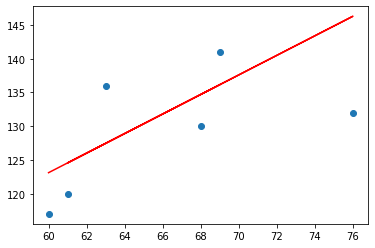

Średni błąd bezwględny: 7.175454985814123

Błąd średniokwadratowy: 63.48947834957053

Pierwiastek błedu średniokwadratowego: 7.968028510840717


In [9]:
sbp = pd.read_csv('SBP.csv')
print(sbp.head(5))

# Wstępny wykres uzyskanych danych
sbp.plot.scatter('Age', 'SBP')
plt.show()

# Podział na zbiory danych
# X - dane niezależne (Age)
# y - dane zależne (SBP)
y, X = dmatrices("SBP ~ Age-1", sbp)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

# Utworzenie modelu regresji liniowej
reg = linear_model.LinearRegression().fit(X_train, y_train)
print("Wskaźnik coef:")
print(reg.coef_)
print("\nWskaźnik intercept:")
print(reg.intercept_)

# Dokonanie predykcji części testowej X
y_pred = reg.predict(X_test)
print("\nDane predykcyjne:")
print(y_pred)
print("\nPosiadane dane:")
print(y_test)

# Wykres konfrontujący dane testowe z predykcjami
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.show()

# Walidacja uzyskanych predykcji
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = metrics.mean_squared_error(y_test, y_pred, squared=False)

print("Średni błąd bezwględny: " + str(MAE))
print("\nBłąd średniokwadratowy: " + str(MSE))
print("\nPierwiastek błedu średniokwadratowego: " + str(RMSE))

Wnioski:

Wyniki uzyskane z drugiego modelu są mniej zadowalające niż w przypadku pierwszego modelu. Można to stwierdzić na przykład na podstawie wartości błędów. Dla drugiego modelu wartości te są zdecydowanie większe, co świadczy o gorszej jakości wyników. Taki obrót spraw spowodowany jest mniejszą liniowością drugiego problemu. Widać to zwłaszcza na końcowym wykresie, gdzie punkty dla zbioru testowego odbiegają znacząco od funkcji liniowej dla predykcji.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [10]:
petrol = pd.read_csv('PETROL.csv')
petrol.head(5)

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [11]:
# Podział na zbiory danych
# X - dane niezależne (Podatek_paliwowy, Sredni_przychod, Utwardzone_autostrady, Procent_ludnosci_z_prawem_jazdy)
# y - dane zależne (Zuzycie_paliwa)
y, X = dmatrices("Zuzycie_paliwa ~ Podatek_paliwowy + Sredni_przychod + Utwardzone_autostrady + Procent_ludnosci_z_prawem_jazdy - 1", petrol)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

# Utworzenie modelu regresji liniowej
reg = linear_model.LinearRegression().fit(X_train, y_train)
print("Wskaźnik coef:")
print(reg.coef_)
print("\nWskaźnik intercept:")
print(reg.intercept_)

# Dokonanie predykcji części testowej X
y_pred = reg.predict(X_test)
print("\nDane predykcyjne:")
print(y_pred)
print("\nPosiadane dane:")
print(y_test)

# Walidacja uzyskanych predykcji
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = metrics.mean_squared_error(y_test, y_pred, squared=False)

print("Średni błąd bezwględny: " + str(MAE))
print("\nBłąd średniokwadratowy: " + str(MSE))
print("\nPierwiastek błedu średniokwadratowego: " + str(RMSE))

Wskaźnik coef:
[[-3.99336011e+01 -4.53815410e-02 -4.95597538e-03  1.03711642e+03]]

Wskaźnik intercept:
[513.1398382]

Dane predykcyjne:
[[594.68473673]
 [657.94626287]
 [578.77796233]
 [577.56584838]
 [524.60050741]
 [632.85908374]
 [575.96166242]
 [649.04536273]
 [556.09293684]
 [525.54298676]
 [497.98650117]
 [529.61281259]
 [361.20860179]
 [714.01098433]
 [608.17110324]]

Posiadane dane:
[[631.]
 [587.]
 [577.]
 [591.]
 [460.]
 [704.]
 [525.]
 [640.]
 [410.]
 [566.]
 [464.]
 [414.]
 [344.]
 [968.]
 [628.]]
Średni błąd bezwględny: 63.02652446557458

Błąd średniokwadratowy: 8076.669020354715

Pierwiastek błedu średniokwadratowego: 89.87028997591315


Wnioski:

Patrząc na wartości błędów można stwierdzić, że uzyskane wyniki predykcji nie są rewelacyjne. Jednak biorąc pod uwagę fakt, że mamy do czynienia z zależnością aż od 5 zmiennych, to wyniki predykcji są zadowalające. Właśnie ilość zmiennych zdecydowanie miała negatywny wpływ na taki wynik. Dodatkowo dane te były całkowicie zróżnicowane i nie został określony żaden przedział, w którym mogłyby się one znajdować. 

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [12]:
heart = pd.read_csv('HEART.csv')
heart.head()
#heart.describe()
#heart.shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [13]:
# oznaczenie braku danych("?") na NaN
heart.replace('?', np.nan, inplace=True)

# usunięcie kolumn zawierających zbyt dużo, czyli więcej niż połowę wierszy, brakujących danych
heart = heart.dropna(1, thresh=(heart.shape[0]/2))

# usunięcie wierszy z brakującymi wartościami
heart = heart.dropna(0, how='any')

# zakodowanie zmiennych niezależnych kategorialnie jako dummy
dummy = pd.get_dummies(heart, columns=['cp', 'restecg'])
dummy.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
0,28,1,130,132,0,185,0,0.0,0,0,1,0,0,0,0,1
1,29,1,120,243,0,160,0,0.0,0,0,1,0,0,1,0,0
3,30,0,170,237,0,170,0,0.0,0,1,0,0,0,0,1,0
4,31,0,100,219,0,150,0,0.0,0,0,1,0,0,0,1,0
5,32,0,105,198,0,165,0,0.0,0,0,1,0,0,1,0,0


In [15]:
# Podział na zbiory danych
# X - dane niezależne
# y - dane zależne

# y, X = dmatrices("num ~ age + sex + trestbps + chol + fbs + thalach + exang + oldpeak + cp_1 + cp_2 + cp_3 + cp_4 + restecg_0 + restecg_1 + restecg_2 - 1",dummy)

# powyższa linijka kodu zwracała błąd, jakoby 'num' nie było zdefiniowane. Jest to o tyle dziwne, że po wywołaniu instrukcji
# dummy.info() kolumna 'num' ewidentnie była widoczna

X = dummy.iloc[:, lambda dummy: [0, 1, 2, 3, 4, 5, 6, 7 , 9, 10, 11, 12, 13, 14, 15]]
y = dummy.iloc[:, 8]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

# Utworzenie modelu regresji liniowej
reg = linear_model.LinearRegression().fit(X_train, y_train)
print("Wskaźnik coef:")
print(reg.coef_)
print("\nWskaźnik intercept:")
print(reg.intercept_)

# Dokonanie predykcji części testowej X
y_pred = reg.predict(X_test)

# Walidacja uzyskanych predykcji
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = metrics.mean_squared_error(y_test, y_pred, squared=False)

print("\nŚredni błąd bezwględny: " + str(MAE))
print("\nBłąd średniokwadratowy: " + str(MSE))
print("\nPierwiastek błedu średniokwadratowego: " + str(RMSE))

Wskaźnik coef:
[-0.00247725  0.10809078 -0.001109    0.00047277  0.33312968 -0.00035225
  0.27608005  0.09286876  0.11940034 -0.2006344  -0.07281484  0.15404891
  0.03413768 -0.00664178 -0.02749589]

Wskaźnik intercept:
0.3228723277687632

Średni błąd bezwględny: 0.29917042549207734

Błąd średniokwadratowy: 0.1437947863292097

Pierwiastek błedu średniokwadratowego: 0.379202830064874


Wyniki zdecydowanie można ocenić jako zadowalające.